# Human Activity Recognition example
Aerobic actions were recorded from subjects using the Inertial Measurement Unit (IMU) on an Apple iPhone 4 smartphone. The IMU includes a 3D accelerometer, gyroscope, and magnetometer. Each sample was taken at 60Hz, and manually trimmed to 500 samples (8.33s) to eliminate starting and stopping movements. The iPhone was always clipped to the belt on the right hand side.

Each file contains 500 rows each with the following information:
Acc_x, Acc_y, Acc_z, Gyr_x, Gyr_y, Gyr_z, Mag_x, Mag_y, Mag_z.

In [1]:
import numpy as np
import pandas as pd
import torch
import mogptk

torch.manual_seed(1);

# MOGP prediction on the sensor values
We use each of the nine sensor's values as channel, leaving us with nine channels to fit using multi output Gaussian processes in order to find cross correlations between the channels.

## Example 1: cycling
Example consisting of measurement for the 9 sensors at 60Hz, with 500 samples per channel, while the person is in a bike.

In [2]:
df = pd.read_csv('data/HAR/Smartphone_Dataset/S05/bike3.csv', header=None)

y = df.values
t = (np.arange(0, 500) / 60)

In [3]:
cols = ['Acc_x', 'Acc_y', 'Acc_z', 'Gyr_x', 'Gyr_y', 'Gyr_z', 'Mag_x', 'Mag_y', 'Mag_z']

data = mogptk.DataSet()
for i in range(9):
    data.append(mogptk.Data(t, y[:, i], name=cols[i]))

### Simulate sensor failure

In [4]:
# randomly sample from the data
for channel in data:
    channel.remove_randomly(pct=0.7)
    
# drop chunks to simulate sensor failure
data[0].remove_range(None, 1)
data[1].remove_range(0.5, 1.2)
data[2].remove_range(7, None)
data[3].remove_range(7.5, None)
data[4].remove_range(7.5, None)
data[6].remove_range(4, 4.3)
data[7].remove_range(1, 2.3)
data[8].remove_range(4.5, 6)

data.transform(mogptk.TransformDetrend())

### Create model 

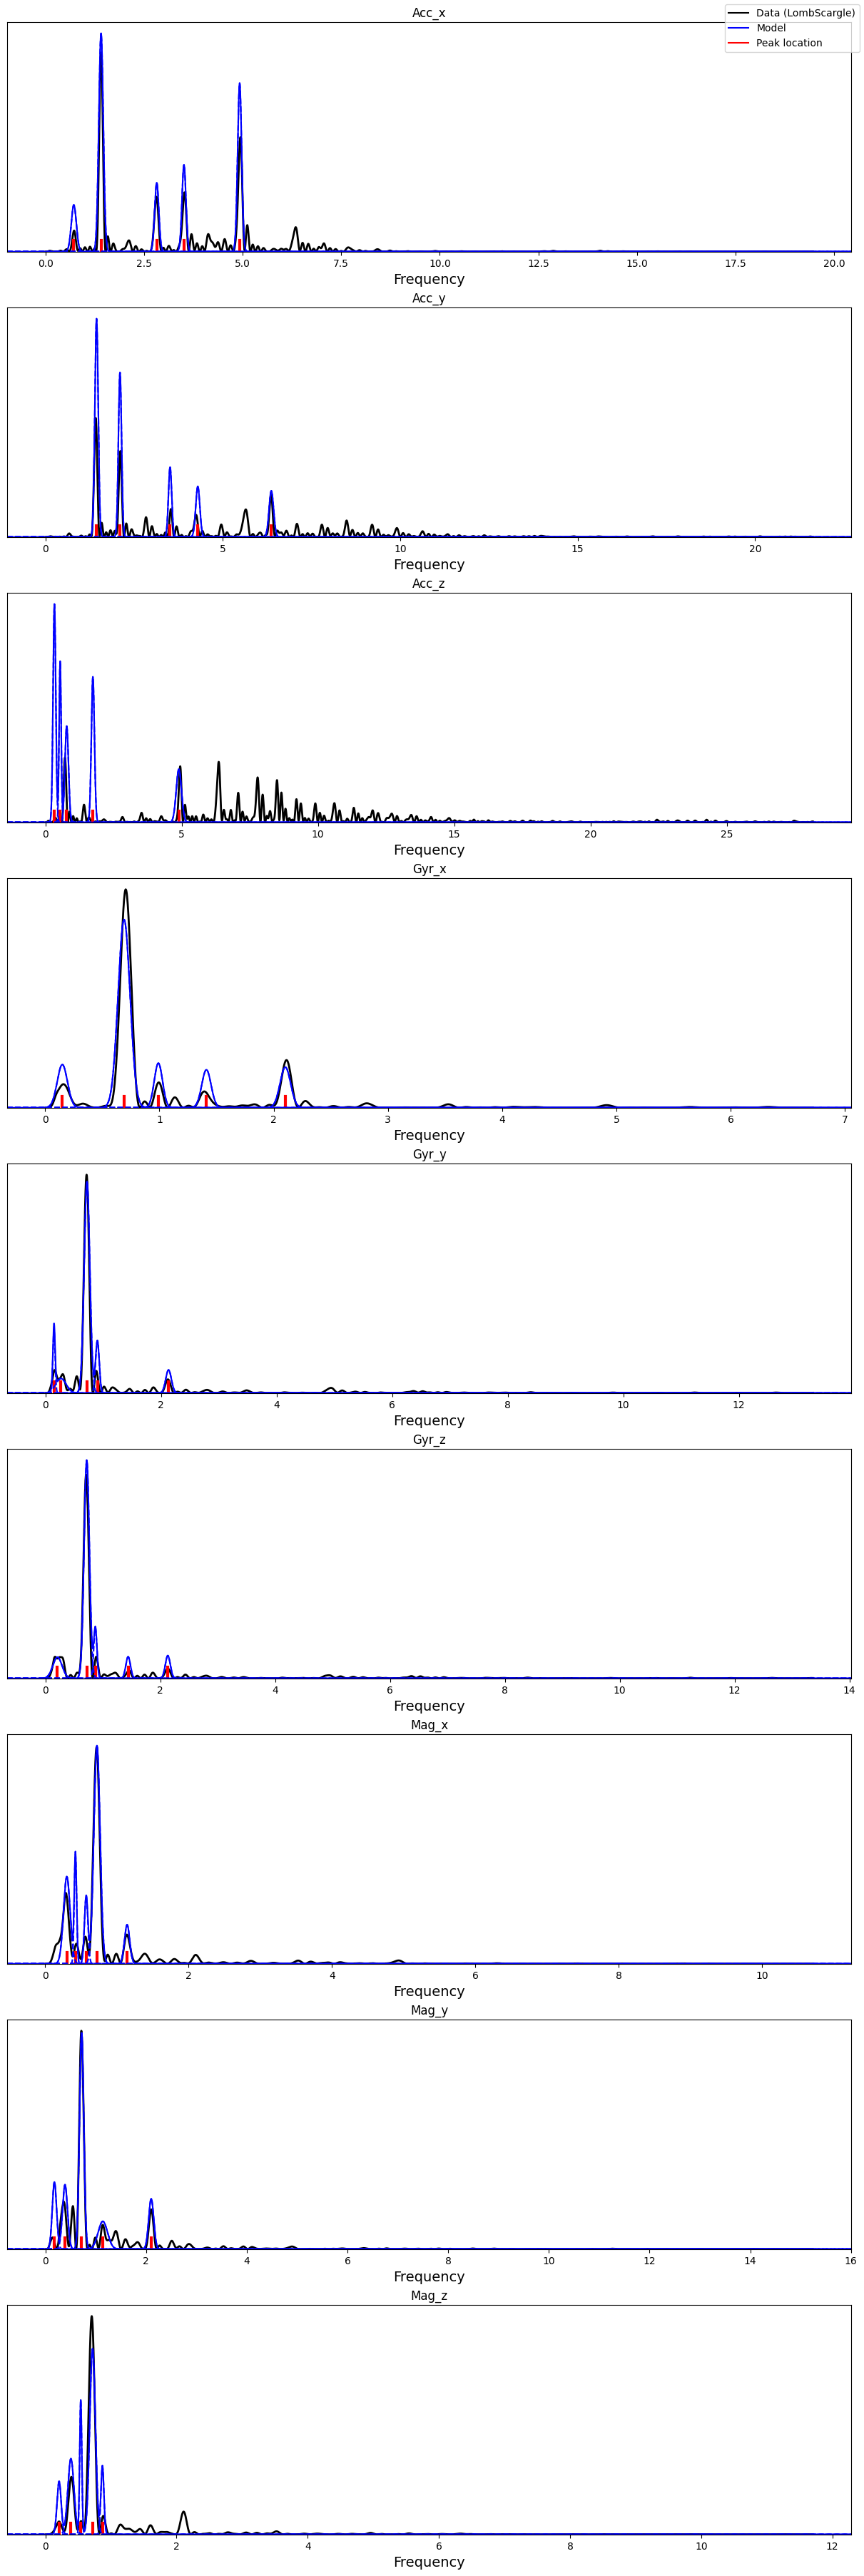

In [13]:
model = mogptk.MOSM(data, Q=5)
model.init_parameters('BNSE')
model.plot_spectrum();

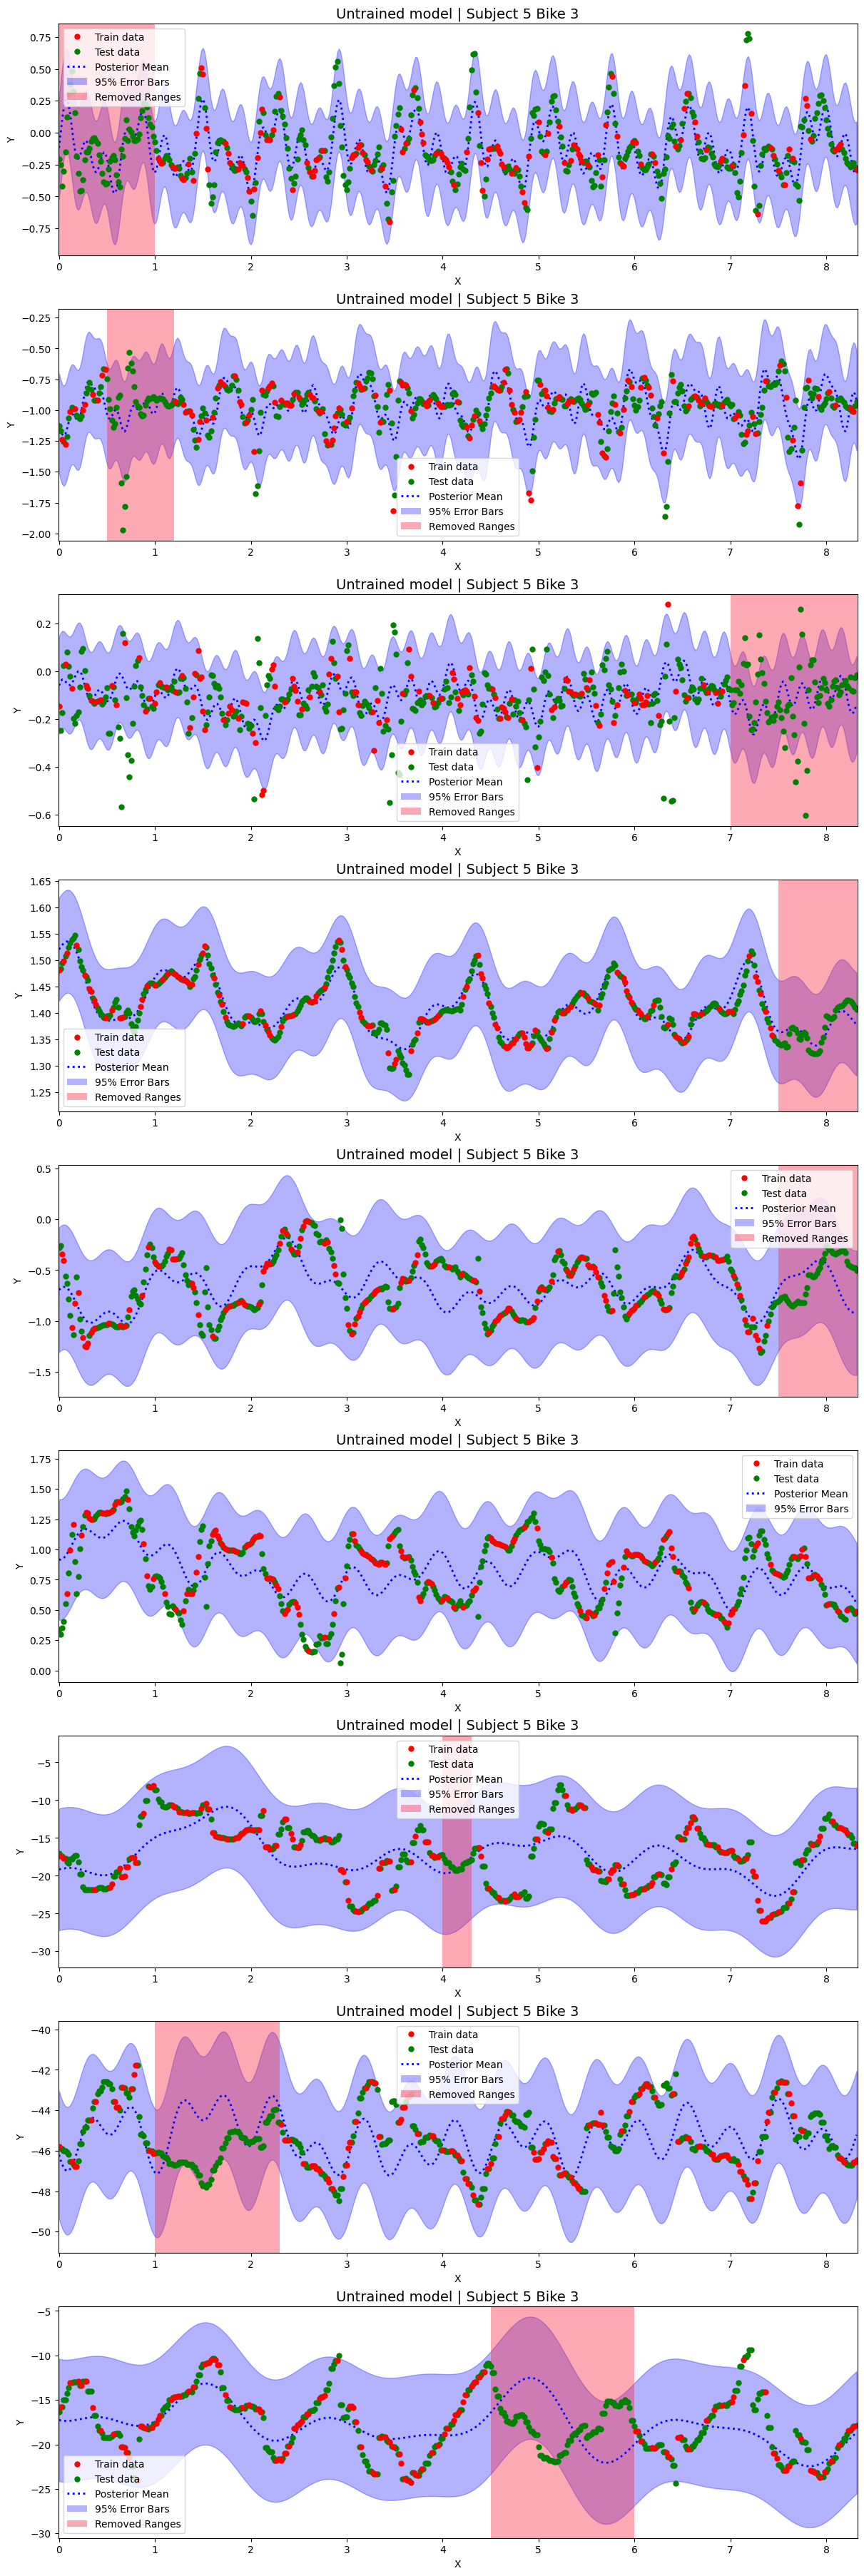

In [14]:
model.plot_prediction(title='Untrained model | Subject 5 Bike 3');

### Model training

Starting optimization using Adam
‣ Model: Exact
  ‣ Kernel: MultiOutputSpectralMixtureKernel
  ‣ Likelihood: GaussianLikelihood
‣ Channels: 9
‣ Parameters: 234
‣ Training points: 1204
‣ Iterations: 1000
     0/1000   0:00:13  loss=     582.192 (warmup)
     2/1000   0:01:03  loss=     458.364
    54/1000   0:01:10  loss=     313.862
   129/1000   0:01:20  loss=     200.463
   202/1000   0:01:30  loss=     125.206
   279/1000   0:01:40  loss=     22.6574
   363/1000   0:01:50  loss=    -41.4176
   448/1000   0:02:00  loss=     -83.651
   533/1000   0:02:10  loss=    -108.979
   618/1000   0:02:20  loss=    -120.341
   704/1000   0:02:30  loss=    -133.578
   778/1000   0:02:40  loss=    -133.598
   853/1000   0:02:50  loss=    -139.304
   926/1000   0:03:00  loss=    -138.559
  1000/1000   0:03:10  loss=    -149.004
Optimization finished in 3 minutes 10 seconds


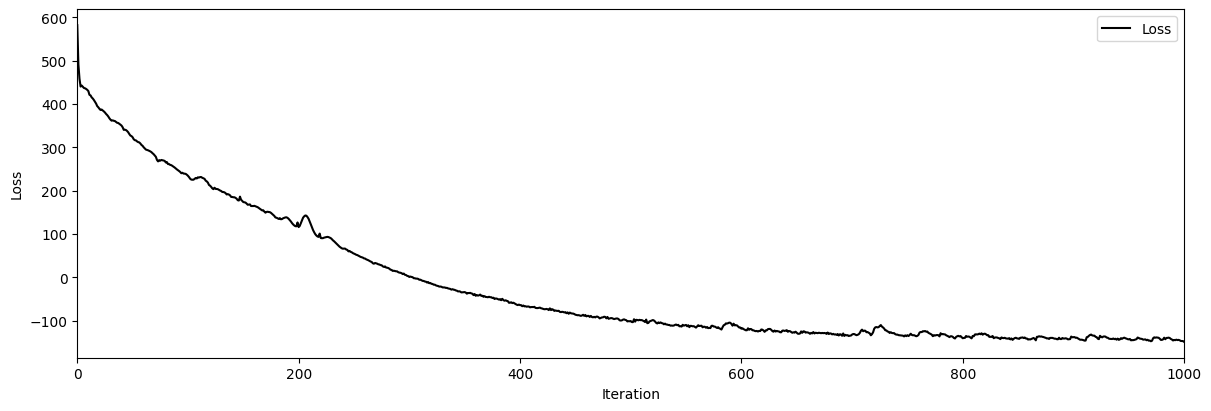

In [15]:
model.train(method='Adam', lr=0.02, iters=1000, verbose=True, plot=True);

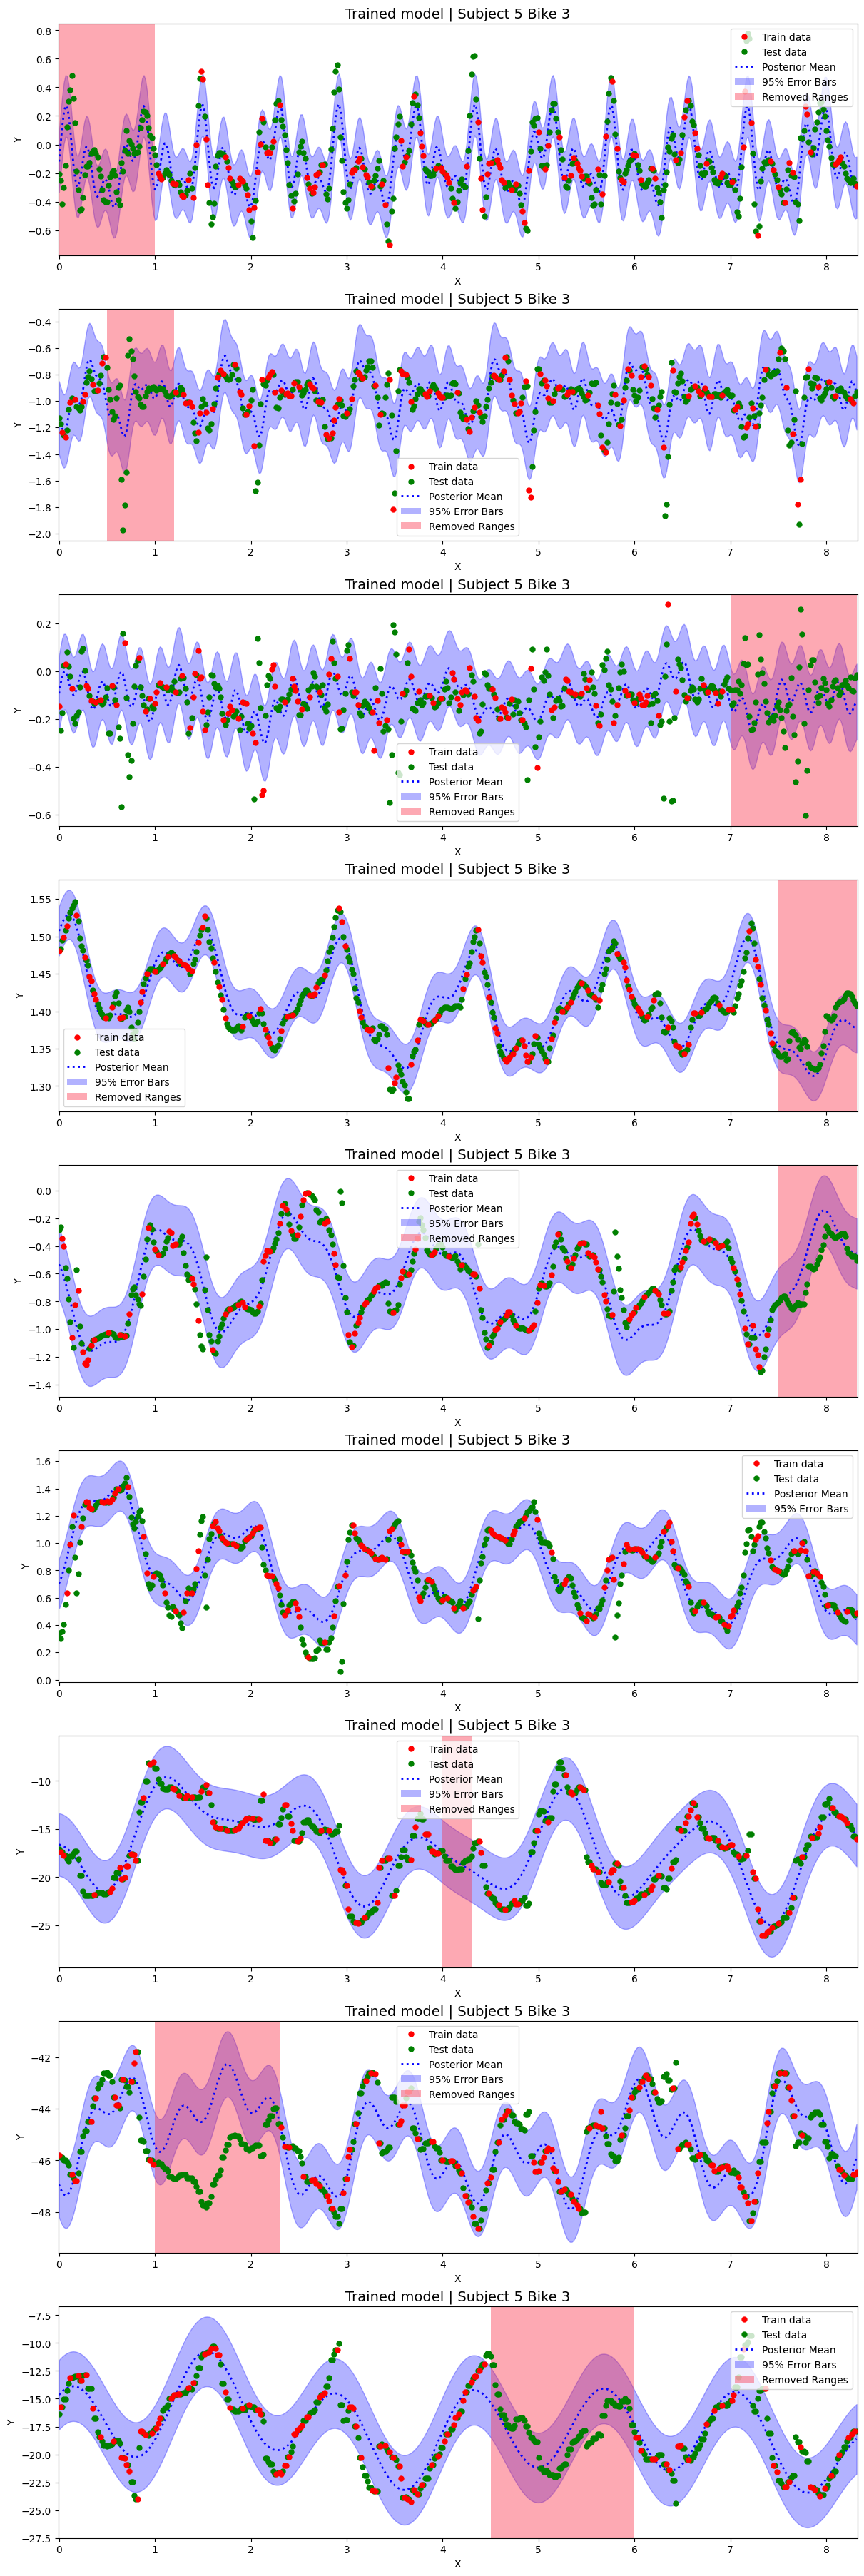

In [16]:
model.plot_prediction(title='Trained model | Subject 5 Bike 3');

## Example 2: walking
Example consisting of measurement for the 9 sensors at 60Hz, with 500 samples per channel, while the person is walking.

In [17]:
df = pd.read_csv('data/HAR/Smartphone_Dataset/S01/walking2.csv', header=None)

y = df.values
t = np.arange(0, 500) / 60

data = mogptk.DataSet()
for i in range(9):
    data.append(mogptk.Data(t, y[:, i], name=cols[i]))

In [18]:
# randomly sample from the data
for channel in data:
    channel.remove_randomly(pct=0.7)
    
# drop chunks to simulate sensor failure
data[0].remove_range(None, 1)
data[1].remove_range(0.5, 1.2)
data[2].remove_range(7, None)
data[3].remove_range(7.5, None)
data[4].remove_range(7.5, None)
data[6].remove_range(4, 4.3)
data[7].remove_range(1, 2.3)
data[8].remove_range(4.5, 6)

data.transform(mogptk.TransformDetrend())

Starting optimization using Adam
‣ Model: Exact
  ‣ Kernel: MultiOutputSpectralMixtureKernel
  ‣ Likelihood: GaussianLikelihood
‣ Channels: 9
‣ Parameters: 144
‣ Training points: 1205
‣ Iterations: 1500
     0/1500   0:00:13  loss=     569.134 (warmup)
     2/1500   0:01:03  loss=     438.994
    58/1500   0:01:10  loss=         344
   143/1500   0:01:20  loss=     250.777
   228/1500   0:01:30  loss=     188.029
   314/1500   0:01:40  loss=     146.638
   399/1500   0:01:50  loss=     99.2743
   481/1500   0:02:00  loss=     73.5437
   556/1500   0:02:10  loss=     56.1977
   631/1500   0:02:20  loss=     43.1375
   704/1500   0:02:30  loss=     61.4399
   779/1500   0:02:40  loss=     33.1814
   854/1500   0:02:50  loss=     31.0374
   928/1500   0:03:00  loss=     34.1956
  1002/1500   0:03:10  loss=     25.1144
  1077/1500   0:03:20  loss=     16.9546
  1153/1500   0:03:30  loss=      15.698
  1227/1500   0:03:40  loss=     16.3419
  1301/1500   0:03:50  loss=     36.7494
  1376/15

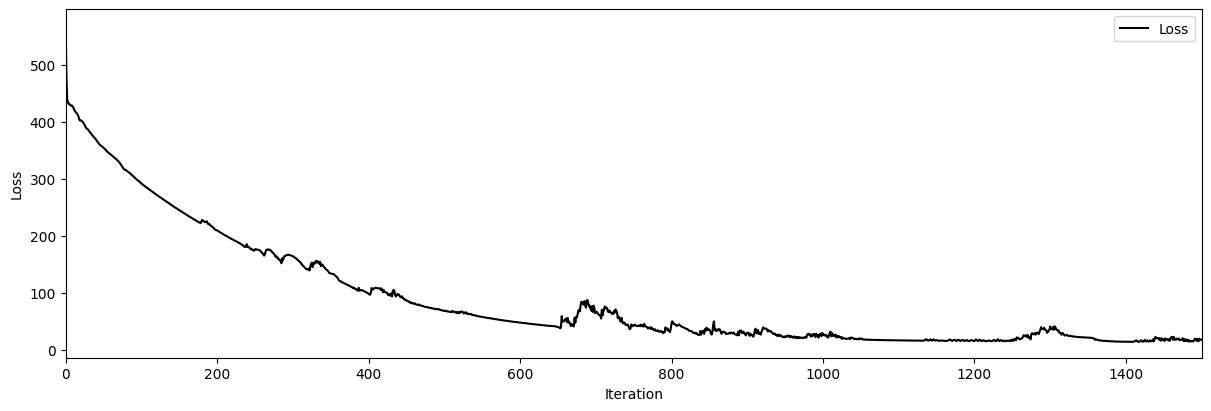

In [19]:
model = mogptk.MOSM(data, Q=3)
model.init_parameters('BNSE')
model.train(method='Adam', lr=0.015, iters=1500, verbose=True, plot=True);

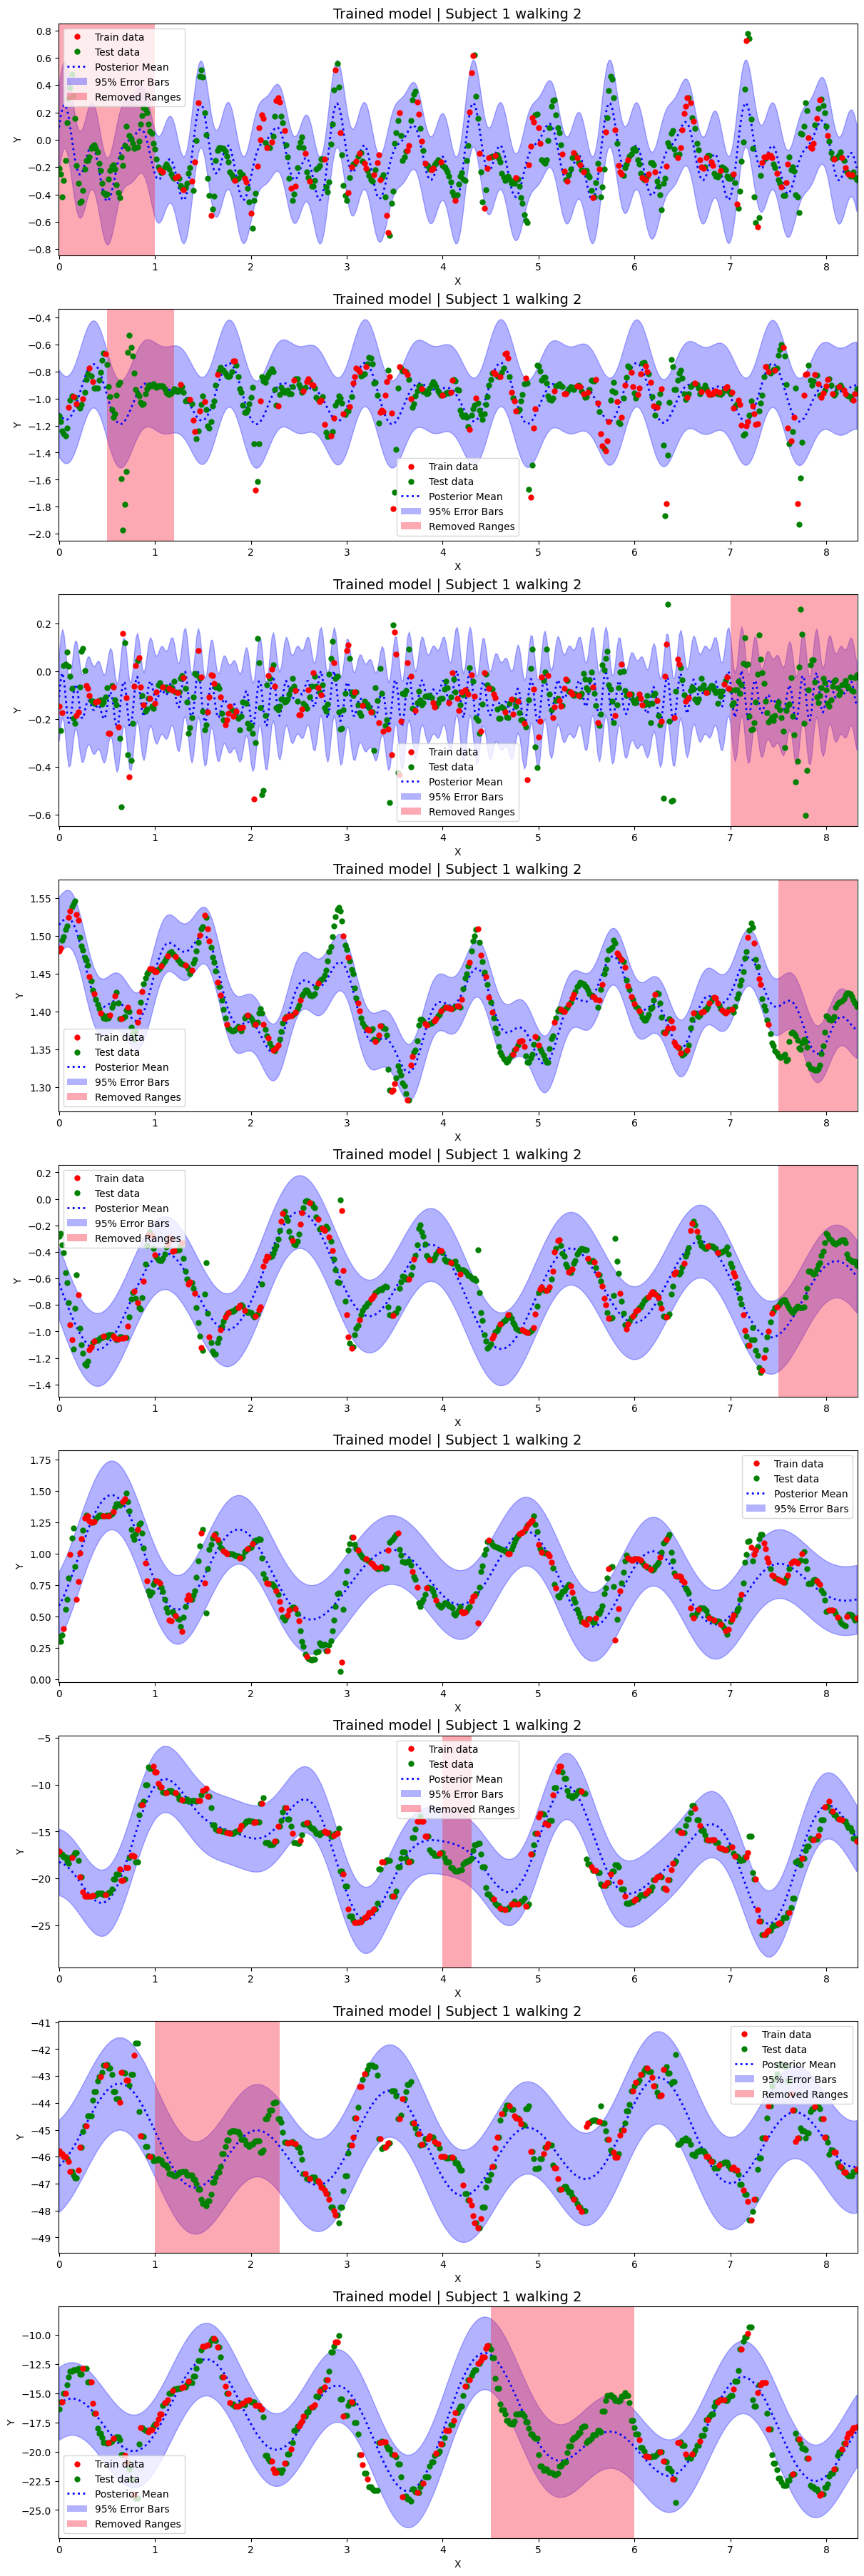

In [20]:
model.plot_prediction(title='Trained model | Subject 1 walking 2');